In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

class Cartoonify:
    def __init__(self, imgLink):
        # Ảnh gốc
        self.original = cv2.imread('../source/' + imgLink) 
        # Ảnh sau khi chỉnh sửa
        self.rs = self.original
        # Chiều cao, rộng
        self.height = len(self.original)
        self.width = len(self.original[0])

    def drawBoth(self):
        rgb_ori = cv2.cvtColor(self.original, cv2.COLOR_BGR2RGB)
        rgb_rs = cv2.cvtColor(self.rs, cv2.COLOR_BGR2RGB)
        plt.subplot(1,2,1)
        plt.imshow(rgb_ori)
        plt.subplot(1,2,2)
        plt.imshow(rgb_rs)
        plt.show()

    def drawOriginal(self):
        rgb_ori = cv2.cvtColor(self.original, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_ori)
        plt.show()

    def drawResult(self):
        rgb_rs = cv2.cvtColor(self.rs, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_rs)
        plt.show()

    def filterNoise(self, frame):
        # Khử noise - bỏ nhiễu
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        frame = cv2.erode(frame,kernel,iterations=2)
        frame = cv2.dilate(frame,kernel,iterations=2)
        return frame

    def detectSkin(self):
        frame = self.filterNoise(self.original)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lowerColor, upperColor = (np.array([0,48,20]), np.array([20,255,255]))
        mask = cv2.inRange(hsv, lowerColor, upperColor)
        self.rs = cv2.bitwise_and(self.original, self.original, mask = mask)

    def detectBlue(self):
        # Khử nhiễu cho ảnh
        frame = self.filterNoise(self.original)
        # chuyển rgb thành hsv 
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # ranh giới của màu xanh
        lowerColor, upperColor = (np.array([95,50,20]), np.array([132,255,255]))
        # tìm vào đặt vào mặt nạ chỉ có màu trắng đen (1: trắng và 0: đen), màu nào là xanh thì tô trắng
        mask = cv2.inRange(hsv, lowerColor, upperColor)
        # xử dụng phép tính bit and để ghép bức ảnh thật và mask lại để hiện ra vật nào là màu xanh
        self.rs = cv2.bitwise_and(self.original, self.original, mask = mask)

    def kernel(self, src, kernel):
        if kernel is None:
            kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
        result = cv2.filter2D(src, -1, kernel)
        return result

    def cartoonize(self):
        frame = self.filterNoise(self.original)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        blur = cv2.blur(gray, (5,5))
        edges = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
        
        color = cv2.blur(frame, (5,5))
        
        self.rs = cv2.bitwise_and(color, color, mask = edges)
    
    def saveImage(self ,imgName = 'output.jpg'):
        # Tên mặc định của hình là output.jpg
        cv2.imwrite(f"../save_images/{imgName}", self.rs)
        


cartoon = Cartoonify("adult_1.jpg")

In [2]:
# cartoon.detectSkin()
# cartoon.drawBoth()

In [3]:
# cartoon.detectBlue()
# cartoon.drawBoth()

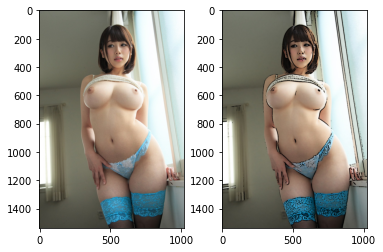

In [4]:
cartoon.cartoonize()
cartoon.drawBoth()
cartoon.saveImage('cartoon_adult.jpg')